# 查看图片尺寸

In [1]:
%matplotlib inline
from PIL import Image
import os
dl = os.listdir('images')
k = 0 
height,weight = 0,0
mode = ' ' 
for i in dl:
    im = Image.open('images/'+i)
    mode = im.mode
    if k == 0:
        weight,height = im.size[0],im.size[1]
        k = 1
    elif weight != im.size[0] or height!= im.size[1]:
        print(weight,height)
        print(im.size[0],im.size[1])
        print(im)
        break
print('all weight X height: %s X %s' %(weight,height))
print('mode: ',mode)
print('images count:',len(dl))

all weight X height: 224 X 224
mode:  RGB
images count: 27153


## LeNet

In [2]:
import torch
torch.cuda.current_device()
from torch import nn
from d2l import torch as d2l

class Reshape(torch.nn.Module):
    def forward(self,x ):
        return x.view(-1, 3, 224, 224)
    
net = torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(3, 6,kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.Conv2d(6, 16,kernel_size=5),
    nn.Sigmoid(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
    nn.AvgPool2d(kernel_size=4, stride=4),
    nn.Flatten(),
#     nn.Linear(16 * 110 * 110, 800), 
    nn.Linear(16 * 55 * 55, 400), 
    nn.Sigmoid(),
    nn.Linear(400, 200),
    nn.Sigmoid(),
    nn.Linear(200, 176)
    )

对原始模型做了一点小改动，去掉了最后一层的高斯激活。除此之外，这个网络与最初的 LeNet-5 一致。

下面，我们将一个大小为  224×224  的三通道（RGB）图像通过 LeNet。 通过在每一层打印输出的形状，我们可以[检查模型]，以确保其操作与我们期望的 :img_lenet_vert 一致。

In [3]:
X = torch.rand(size=(1, 3, 224, 224),dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Reshape output shape: 	 torch.Size([1, 3, 224, 224])
Conv2d output shape: 	 torch.Size([1, 6, 224, 224])
Sigmoid output shape: 	 torch.Size([1, 6, 224, 224])
Conv2d output shape: 	 torch.Size([1, 16, 220, 220])
Sigmoid output shape: 	 torch.Size([1, 16, 220, 220])
AvgPool2d output shape: 	 torch.Size([1, 16, 55, 55])
Flatten output shape: 	 torch.Size([1, 48400])
Linear output shape: 	 torch.Size([1, 400])
Sigmoid output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 200])
Sigmoid output shape: 	 torch.Size([1, 200])
Linear output shape: 	 torch.Size([1, 176])


## 模型训练


In [4]:
import numpy as np
import pandas as pd
import shutil

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
val_ratio = 0.2

train_path='train_images/'
val_path='val_images/'
test_path='test_images/'

print('train data shape: ' ,train_data.shape)
print('test data shape: ' ,test_data.shape)
# print(train_data.iloc[:,1].unique())
# print(train_data.iloc[:,1].count())
#将训练集切分成训练集和验证集
label_list = train_data.iloc[:,1].tolist()
label_dict = dict(zip(*np.unique(label_list,return_counts = True)))
# print(label_dict)
if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(val_path):
    os.makedirs(val_path)


image_paths = train_data.iloc[:,0] 
labels = train_data.iloc[:,1] 
count_dict = label_dict.copy()
for k, v in count_dict.items():
    count_dict[k] = 0
# print(count_dict)
# print(label_dict)

#分别将文件复制到train_images和val_images
for a,b in zip(image_paths,labels):
    print(count_dict[b])
    print(label_dict[b]*(1-val_ratio))
    if count_dict[b] <= label_dict[b]*(1-val_ratio):
        sub_train_path = train_path + b
        if not os.path.exists(sub_train_path):
            os.makedirs(sub_train_path)
        print(sub_train_path)
        count_dict[b] += 1
        shutil.copy(a,sub_train_path)
    else:
        sub_val_path = val_path + b
        if not os.path.exists(sub_val_path):
            os.makedirs(sub_val_path)
        print(sub_val_path)
        count_dict[b] += 1
        shutil.copy(a,sub_val_path)


train data shape:  (18353, 2)
test data shape:  (8800, 1)
0
282.40000000000003
train_images/maclura_pomifera
1
282.40000000000003
train_images/maclura_pomifera
2
282.40000000000003
train_images/maclura_pomifera
3
282.40000000000003
train_images/maclura_pomifera
4
282.40000000000003
train_images/maclura_pomifera
5
282.40000000000003
train_images/maclura_pomifera
0
188.0
train_images/ulmus_rubra
0
171.20000000000002
train_images/broussonettia_papyrifera
6
282.40000000000003
train_images/maclura_pomifera
1
171.20000000000002
train_images/broussonettia_papyrifera
7
282.40000000000003
train_images/maclura_pomifera
0
178.4
train_images/prunus_virginiana
8
282.40000000000003
train_images/maclura_pomifera
1
178.4
train_images/prunus_virginiana
2
171.20000000000002
train_images/broussonettia_papyrifera
9
282.40000000000003
train_images/maclura_pomifera
10
282.40000000000003
train_images/maclura_pomifera
3
171.20000000000002
train_images/broussonettia_papyrifera
11
282.40000000000003
train_image

train_images/ulmus_pumila
37
282.40000000000003
train_images/maclura_pomifera
8
154.4
train_images/ptelea_trifoliata
26
178.4
train_images/prunus_virginiana
0
124.0
train_images/styrax_japonica
25
171.20000000000002
train_images/broussonettia_papyrifera
4
112.80000000000001
train_images/acer_palmatum
1
138.4
train_images/quercus_montana
9
154.4
train_images/ptelea_trifoliata
5
151.20000000000002
train_images/ulmus_pumila
6
151.20000000000002
train_images/ulmus_pumila
27
178.4
train_images/prunus_virginiana
0
84.0
train_images/malus_pumila
0
167.20000000000002
train_images/prunus_sargentii
8
123.2
train_images/quercus_muehlenbergii
7
116.0
train_images/juglans_cinerea
3
99.2
train_images/koelreuteria_paniculata
8
116.0
train_images/juglans_cinerea
9
116.0
train_images/juglans_cinerea
7
151.20000000000002
train_images/ulmus_pumila
26
171.20000000000002
train_images/broussonettia_papyrifera
4
99.2
train_images/koelreuteria_paniculata
1
84.0
train_images/malus_pumila
10
116.0
train_images/

1
116.0
train_images/catalpa_bignonioides
31
173.60000000000002
train_images/acer_rubrum
3
80.80000000000001
train_images/picea_abies
1
78.4
train_images/quercus_macrocarpa
8
124.0
train_images/styrax_japonica
6
78.4
train_images/cornus_mas
49
282.40000000000003
train_images/maclura_pomifera
17
101.60000000000001
train_images/tilia_cordata
0
80.0
train_images/populus_deltoides
2
78.4
train_images/quercus_macrocarpa
50
282.40000000000003
train_images/maclura_pomifera
6
97.60000000000001
train_images/eucommia_ulmoides
7
97.60000000000001
train_images/eucommia_ulmoides
16
116.0
train_images/juglans_cinerea
19
151.20000000000002
train_images/ulmus_pumila
6
88.0
train_images/magnolia_virginiana
4
110.4
train_images/ostrya_virginiana
0
114.4
train_images/ulmus_americana
19
115.2
train_images/cercis_canadensis
2
136.0
train_images/ilex_opaca
27
188.0
train_images/ulmus_rubra
3
92.0
train_images/zelkova_serrata
2
96.0
train_images/tsuga_canadensis
0
84.80000000000001
train_images/pinus_bungean

16
88.0
train_images/magnolia_virginiana
4
83.2
train_images/pinus_parviflora
1
63.2
train_images/chionanthus_retusus
9
76.0
train_images/populus_tremuloides
6
84.0
train_images/quercus_stellata
13
98.4
train_images/catalpa_speciosa
3
85.60000000000001
train_images/quercus_alba
1
76.0
train_images/castanea_dentata
7
78.4
train_images/quercus_macrocarpa
11
122.4
train_images/aesculus_pavi
29
115.2
train_images/cercis_canadensis
26
154.4
train_images/ptelea_trifoliata
41
173.60000000000002
train_images/acer_rubrum
2
71.2
train_images/amelanchier_canadensis
16
110.4
train_images/ostrya_virginiana
7
80.0
train_images/populus_deltoides
42
173.60000000000002
train_images/acer_rubrum
12
89.60000000000001
train_images/magnolia_denudata
8
80.0
train_images/populus_deltoides
30
115.2
train_images/cercis_canadensis
26
139.20000000000002
train_images/asimina_triloba
1
80.0
train_images/liquidambar_styraciflua
12
97.60000000000001
train_images/eucommia_ulmoides
1
87.2
train_images/quercus_marilandi

90
282.40000000000003
train_images/maclura_pomifera
5
76.0
train_images/castanea_dentata
33
112.80000000000001
train_images/cryptomeria_japonica
1
82.4
train_images/pinus_resinosa
10
80.80000000000001
train_images/picea_abies
10
84.80000000000001
train_images/pinus_bungeana
18
116.0
train_images/chionanthus_virginicus
7
71.2
train_images/amelanchier_canadensis
31
151.20000000000002
train_images/ulmus_pumila
0
80.0
train_images/salix_matsudana
53
171.20000000000002
train_images/broussonettia_papyrifera
9
92.0
train_images/zelkova_serrata
20
114.4
train_images/ulmus_americana
2
74.4
train_images/tilia_americana
8
80.80000000000001
train_images/magnolia_stellata
53
178.4
train_images/prunus_virginiana
27
138.4
train_images/quercus_montana
15
92.0
train_images/acer_saccharum
20
124.80000000000001
train_images/acer_negundo
17
124.0
train_images/styrax_japonica
11
80.80000000000001
train_images/picea_abies
34
112.80000000000001
train_images/cryptomeria_japonica
13
102.4
train_images/gleditsi

train_images/ulmus_pumila
1
68.8
train_images/acer_ginnala
7
76.0
train_images/castanea_dentata
19
136.0
train_images/ilex_opaca
54
173.60000000000002
train_images/acer_rubrum
21
104.0
train_images/carya_cordiformis
17
84.80000000000001
train_images/pinus_bungeana
14
84.0
train_images/quercus_stellata
21
124.0
train_images/styrax_japonica
12
85.60000000000001
train_images/cornus_florida
9
66.4
train_images/magnolia_acuminata
5
74.4
train_images/cedrus_atlantica
2
62.400000000000006
train_images/betula_jacqemontii
21
128.8
train_images/liriodendron_tulipifera
9
79.2
train_images/pinus_virginiana
6
74.4
train_images/abies_nordmanniana
33
138.4
train_images/quercus_montana
32
138.4
train_images/diospyros_virginiana
43
115.2
train_images/cercis_canadensis
34
138.4
train_images/quercus_montana
14
87.2
train_images/carya_glabra
3
68.0
train_images/larix_decidua
8
79.2
train_images/quercus_virginiana
6
74.4
train_images/tilia_americana
8
68.0
train_images/prunus_pensylvanica
4
68.0
train_imag

18
80.0
train_images/liquidambar_styraciflua
2
64.0
train_images/acer_campestre
3
62.400000000000006
train_images/crataegus_phaenopyrum
2
75.2
train_images/pinus_wallichiana
2
68.8
train_images/acer_ginnala
4
62.400000000000006
train_images/crataegus_phaenopyrum
18
79.2
train_images/crataegus_viridis
3
68.8
train_images/malus_coronaria
3
61.6
train_images/ginkgo_biloba
19
62.400000000000006
train_images/morus_alba
20
92.0
train_images/acer_saccharum
64
188.0
train_images/ulmus_rubra
1
56.800000000000004
train_images/fraxinus_pennsylvanica
3
66.4
train_images/celtis_tenuifolia
41
139.20000000000002
train_images/asimina_triloba
19
84.0
train_images/quercus_stellata
41
112.80000000000001
train_images/staphylea_trifolia
15
86.4
train_images/taxodium_distichum
9
76.0
train_images/pinus_nigra
4
61.6
train_images/ginkgo_biloba
21
92.0
train_images/acer_saccharum
12
80.80000000000001
train_images/quercus_michauxii
66
171.20000000000002
train_images/broussonettia_papyrifera
62
178.4
train_image

4
67.2
train_images/prunus_serotina
13
66.4
train_images/magnolia_acuminata
46
115.2
train_images/cercis_canadensis
6
76.0
train_images/pinus_koraiensis
34
101.60000000000001
train_images/tilia_cordata
7
74.4
train_images/abies_nordmanniana
43
138.4
train_images/quercus_montana
10
78.4
train_images/quercus_nigra
30
84.0
train_images/malus_pumila
18
80.80000000000001
train_images/prunus_subhirtella
4
80.80000000000001
train_images/cedrus_libani
4
71.2
train_images/acer_pensylvanicum
19
87.2
train_images/quercus_marilandica
68
188.0
train_images/ulmus_rubra
5
66.4
train_images/celtis_tenuifolia
40
151.20000000000002
train_images/ulmus_pumila
12
68.0
train_images/larix_decidua
6
75.2
train_images/pinus_peucea
7
69.60000000000001
train_images/pinus_sylvestris
13
79.2
train_images/ulmus_parvifolia
11
101.60000000000001
train_images/salix_nigra
13
68.0
train_images/larix_decidua
46
167.20000000000002
train_images/prunus_sargentii
2
56.800000000000004
train_images/fraxinus_pennsylvanica
15
95

25
78.4
train_images/quercus_macrocarpa
19
79.2
train_images/ulmus_parvifolia
4
54.400000000000006
train_images/amelanchier_arborea
43
112.80000000000001
train_images/cryptomeria_japonica
19
83.2
train_images/pinus_parviflora
29
98.4
train_images/catalpa_speciosa
23
79.2
train_images/crataegus_viridis
16
80.80000000000001
train_images/salix_caroliniana
12
80.80000000000001
train_images/oxydendrum_arboreum
18
80.0
train_images/populus_deltoides
54
154.4
train_images/ptelea_trifoliata
45
112.80000000000001
train_images/staphylea_trifolia
10
80.80000000000001
train_images/cedrus_libani
23
85.60000000000001
train_images/quercus_alba
19
84.0
train_images/chamaecyparis_pisifera
10
74.4
train_images/cedrus_atlantica
23
87.2
train_images/quercus_marilandica
13
78.4
train_images/quercus_nigra
16
77.60000000000001
train_images/pinus_taeda
10
63.2
train_images/chionanthus_retusus
5
71.2
train_images/acer_pensylvanicum
6
78.4
train_images/picea_orientalis
2
73.60000000000001
train_images/quercus_s

21
83.2
train_images/pinus_parviflora
19
82.4
train_images/pinus_resinosa
2
64.0
train_images/halesia_tetraptera
15
79.2
train_images/ficus_carica
12
63.2
train_images/chionanthus_retusus
9
64.8
train_images/robinia_pseudo-acacia
26
97.60000000000001
train_images/eucommia_ulmoides
14
64.0
train_images/albizia_julibrissin
24
92.0
train_images/zelkova_serrata
34
116.0
train_images/chionanthus_virginicus
23
80.0
train_images/salix_matsudana
35
116.0
train_images/chionanthus_virginicus
36
136.0
train_images/ilex_opaca
28
85.60000000000001
train_images/cornus_florida
11
73.60000000000001
train_images/quercus_shumardii
17
88.80000000000001
train_images/pinus_cembra
11
66.4
train_images/phellodendron_amurense
17
64.0
train_images/magnolia_macrophylla
33
128.8
train_images/liriodendron_tulipifera
16
79.2
train_images/ficus_carica
28
92.0
train_images/acer_saccharum
22
77.60000000000001
train_images/pinus_taeda
13
62.400000000000006
train_images/betula_jacqemontii
24
80.0
train_images/salix_mat

19
70.4
train_images/fagus_grandifolia
12
64.8
train_images/robinia_pseudo-acacia
58
151.20000000000002
train_images/ulmus_pumila
0
46.400000000000006
train_images/cedrus_deodara
12
64.0
train_images/acer_campestre
79
188.0
train_images/ulmus_rubra
23
84.0
train_images/pyrus_calleryana
1
46.400000000000006
train_images/cedrus_deodara
79
178.4
train_images/prunus_virginiana
14
78.4
train_images/aesculus_glabra
38
116.0
train_images/chionanthus_virginicus
3
65.60000000000001
train_images/betula_populifolia
4
64.0
train_images/halesia_tetraptera
10
67.2
train_images/prunus_serotina
2
46.400000000000006
train_images/cedrus_deodara
80
178.4
train_images/prunus_virginiana
13
64.8
train_images/quercus_bicolor
39
116.0
train_images/chionanthus_virginicus
40
112.80000000000001
train_images/acer_palmatum
29
88.80000000000001
train_images/carpinus_caroliniana
57
167.20000000000002
train_images/prunus_sargentii
14
66.4
train_images/phellodendron_amurense
20
88.80000000000001
train_images/pinus_cem

train_images/cornus_kousa
25
62.400000000000006
train_images/morus_alba
66
167.20000000000002
train_images/prunus_sargentii
30
80.0
train_images/salix_matsudana
24
81.60000000000001
train_images/quercus_acutissima
5
56.800000000000004
train_images/prunus_serrulata
9
62.400000000000006
train_images/quercus_coccinea
33
71.2
train_images/amelanchier_canadensis
56
140.8
train_images/abies_concolor
17
64.8
train_images/robinia_pseudo-acacia
23
74.4
train_images/cedrus_atlantica
17
62.400000000000006
train_images/betula_jacqemontii
9
64.0
train_images/halesia_tetraptera
18
64.8
train_images/quercus_bicolor
22
69.60000000000001
train_images/pinus_sylvestris
7
65.60000000000001
train_images/betula_populifolia
30
81.60000000000001
train_images/picea_pungens
14
68.8
train_images/amelanchier_laevis
22
82.4
train_images/pinus_flexilis
31
87.2
train_images/quercus_marilandica
28
80.80000000000001
train_images/quercus_michauxii
22
70.4
train_images/crataegus_pruinosa
46
101.60000000000001
train_imag

68
167.20000000000002
train_images/prunus_sargentii
12
63.2
train_images/quercus_robur
19
74.4
train_images/abies_nordmanniana
5
46.400000000000006
train_images/cedrus_deodara
25
78.4
train_images/pinus_rigida
61
138.4
train_images/diospyros_virginiana
87
188.0
train_images/ulmus_rubra
13
68.8
train_images/malus_coronaria
17
73.60000000000001
train_images/quercus_shumardii
26
88.80000000000001
train_images/pinus_cembra
20
71.2
train_images/acer_pensylvanicum
26
76.0
train_images/pinus_nigra
42
128.8
train_images/liriodendron_tulipifera
21
71.2
train_images/acer_pensylvanicum
35
102.4
train_images/gleditsia_triacanthos
14
64.0
train_images/acer_campestre
36
104.0
train_images/carya_cordiformis
15
60.800000000000004
train_images/platanus_acerifolia
10
54.400000000000006
train_images/betula_lenta
15
68.8
train_images/acer_ginnala
57
123.2
train_images/quercus_muehlenbergii
27
62.400000000000006
train_images/morus_alba
15
75.2
train_images/pinus_wallichiana
29
84.0
train_images/quercus_ste

train_images/broussonettia_papyrifera
68
151.20000000000002
train_images/ulmus_pumila
65
139.20000000000002
train_images/asimina_triloba
9
56.800000000000004
train_images/acer_pseudoplatanus
16
74.4
train_images/pinus_pungens
23
66.4
train_images/magnolia_acuminata
15
62.400000000000006
train_images/paulownia_tomentosa
29
74.4
train_images/cedrus_atlantica
69
151.20000000000002
train_images/ulmus_pumila
18
75.2
train_images/pinus_peucea
88
173.60000000000002
train_images/acer_rubrum
20
74.4
train_images/tilia_americana
16
68.8
train_images/acer_ginnala
19
62.400000000000006
train_images/crataegus_phaenopyrum
11
60.0
train_images/aesculus_hippocastamon
36
71.2
train_images/amelanchier_canadensis
28
80.80000000000001
train_images/salix_caroliniana
14
68.8
train_images/malus_coronaria
23
78.4
train_images/pinus_densiflora
10
60.800000000000004
train_images/betula_nigra
16
68.0
train_images/prunus_pensylvanica
16
62.400000000000006
train_images/paulownia_tomentosa
22
78.4
train_images/quer

31
74.4
train_images/cedrus_atlantica
52
101.60000000000001
train_images/tilia_cordata
25
69.60000000000001
train_images/malus_hupehensis
42
84.0
train_images/malus_pumila
27
80.80000000000001
train_images/oxydendrum_arboreum
31
76.0
train_images/castanea_dentata
20
71.2
train_images/carya_ovata
17
60.0
train_images/morus_rubra
39
89.60000000000001
train_images/magnolia_denudata
9
55.2
train_images/celtis_occidentalis
30
76.80000000000001
train_images/populus_grandidentata
35
101.60000000000001
train_images/salix_nigra
20
62.400000000000006
train_images/betula_jacqemontii
8
56.800000000000004
train_images/quercus_palustris
29
79.2
train_images/stewartia_pseudocamellia
51
99.2
train_images/koelreuteria_paniculata
53
101.60000000000001
train_images/tilia_cordata
92
171.20000000000002
train_images/broussonettia_papyrifera
26
69.60000000000001
train_images/malus_hupehensis
63
140.8
train_images/abies_concolor
55
114.4
train_images/ulmus_americana
26
64.8
train_images/robinia_pseudo-acacia


train_images/prunus_virginiana
51
116.0
train_images/catalpa_bignonioides
14
56.800000000000004
train_images/carpinus_betulus
38
87.2
train_images/quercus_marilandica
16
65.60000000000001
train_images/betula_populifolia
66
138.4
train_images/quercus_montana
38
80.0
train_images/liquidambar_styraciflua
65
116.0
train_images/juglans_cinerea
37
80.80000000000001
train_images/prunus_subhirtella
81
167.20000000000002
train_images/prunus_sargentii
101
188.0
train_images/ulmus_rubra
20
71.2
train_images/malus_baccata
37
85.60000000000001
train_images/cornus_florida
15
55.2
train_images/celtis_occidentalis
21
75.2
train_images/pinus_wallichiana
2
53.6
train_images/pinus_thunbergii
78
154.4
train_images/ptelea_trifoliata
7
46.400000000000006
train_images/ailanthus_altissima
17
62.400000000000006
train_images/paulownia_tomentosa
67
138.4
train_images/quercus_montana
39
84.0
train_images/pyrus_calleryana
17
68.8
train_images/acer_ginnala
22
75.2
train_images/pinus_wallichiana
43
98.4
train_images

train_images/tilia_americana
23
75.2
train_images/pinus_peucea
23
65.60000000000001
train_images/betula_populifolia
16
67.2
train_images/prunus_serotina
26
75.2
train_images/ulmus_glabra
18
69.60000000000001
train_images/betula_alleghaniensis
64
114.4
train_images/ulmus_americana
103
178.4
train_images/prunus_virginiana
26
76.80000000000001
train_images/pinus_echinata
43
101.60000000000001
train_images/salix_nigra
61
101.60000000000001
train_images/tilia_cordata
30
66.4
train_images/magnolia_acuminata
36
79.2
train_images/stewartia_pseudocamellia
34
86.4
train_images/taxodium_distichum
37
88.80000000000001
train_images/pinus_cembra
37
84.0
train_images/quercus_velutina
104
178.4
train_images/prunus_virginiana
27
70.4
train_images/fagus_grandifolia
17
62.400000000000006
train_images/quercus_coccinea
18
78.4
train_images/picea_orientalis
29
56.800000000000004
train_images/tilia_europaea
23
66.4
train_images/phellodendron_amurense
34
76.0
train_images/castanea_dentata
68
116.0
train_image

44
85.60000000000001
train_images/quercus_alba
73
140.8
train_images/abies_concolor
21
60.0
train_images/aesculus_hippocastamon
11
46.400000000000006
train_images/cedrus_deodara
44
77.60000000000001
train_images/pinus_taeda
10
42.400000000000006
train_images/evodia_daniellii
32
79.2
train_images/chamaecyparis_thyoides
107
178.4
train_images/prunus_virginiana
69
112.80000000000001
train_images/staphylea_trifolia
23
66.4
train_images/gymnocladus_dioicus
30
69.60000000000001
train_images/malus_hupehensis
38
84.0
train_images/chamaecyparis_pisifera
53
88.0
train_images/magnolia_virginiana
31
74.4
train_images/tilia_americana
19
67.2
train_images/prunus_serotina
19
58.400000000000006
train_images/prunus_yedoensis
45
85.60000000000001
train_images/quercus_alba
23
69.60000000000001
train_images/betula_alleghaniensis
23
64.8
train_images/tilia_tomentosa
43
80.80000000000001
train_images/quercus_michauxii
20
78.4
train_images/picea_orientalis
38
76.0
train_images/populus_tremuloides
33
79.2
tra

26
68.0
train_images/prunus_pensylvanica
43
80.0
train_images/liquidambar_styraciflua
105
171.20000000000002
train_images/broussonettia_papyrifera
111
178.4
train_images/prunus_virginiana
46
87.2
train_images/carya_glabra
26
66.4
train_images/phellodendron_amurense
48
84.0
train_images/carya_tomentosa
27
74.4
train_images/pinus_pungens
49
92.0
train_images/acer_saccharum
27
65.60000000000001
train_images/betula_populifolia
39
76.80000000000001
train_images/populus_grandidentata
12
46.400000000000006
train_images/cedrus_deodara
32
80.80000000000001
train_images/cedrus_libani
24
77.60000000000001
train_images/juglans_nigra
42
78.4
train_images/nyssa_sylvatica
32
76.80000000000001
train_images/pinus_echinata
56
128.8
train_images/liriodendron_tulipifera
25
64.0
train_images/acer_campestre
31
84.0
train_images/metasequoia_glyptostroboides
60
122.4
train_images/aesculus_pavi
22
62.400000000000006
train_images/quercus_coccinea
7
53.6
train_images/pinus_thunbergii
61
99.2
train_images/koelreu

24
67.2
train_images/prunus_serotina
75
112.80000000000001
train_images/staphylea_trifolia
29
60.0
train_images/morus_rubra
36
69.60000000000001
train_images/magnolia_tripetala
52
85.60000000000001
train_images/quercus_alba
74
124.80000000000001
train_images/acer_negundo
50
84.0
train_images/quercus_stellata
36
80.80000000000001
train_images/salix_caroliniana
66
116.0
train_images/catalpa_bignonioides
37
78.4
train_images/quercus_nigra
45
81.60000000000001
train_images/picea_pungens
55
102.4
train_images/gleditsia_triacanthos
47
88.80000000000001
train_images/pinus_cembra
26
78.4
train_images/picea_orientalis
110
171.20000000000002
train_images/broussonettia_papyrifera
44
80.80000000000001
train_images/quercus_michauxii
54
98.4
train_images/catalpa_speciosa
32
74.4
train_images/pinus_pungens
17
55.2
train_images/sassafras_albidum
42
82.4
train_images/pinus_resinosa
30
68.0
train_images/larix_decidua
47
85.60000000000001
train_images/cornus_florida
25
66.4
train_images/celtis_tenuifolia

52
84.0
train_images/malus_pumila
41
71.2
train_images/acer_pensylvanicum
53
88.80000000000001
train_images/pinus_cembra
27
68.8
train_images/malus_floribunda
33
73.60000000000001
train_images/quercus_shumardii
49
77.60000000000001
train_images/pinus_taeda
16
46.400000000000006
train_images/cedrus_deodara
51
78.4
train_images/quercus_macrocarpa
65
112.80000000000001
train_images/cryptomeria_japonica
51
108.0
train_images/fraxinus_nigra
118
178.4
train_images/prunus_virginiana
72
101.60000000000001
train_images/tilia_cordata
113
173.60000000000002
train_images/acer_rubrum
79
124.80000000000001
train_images/acer_negundo
32
64.0
train_images/magnolia_macrophylla
64
122.4
train_images/aesculus_pavi
37
74.4
train_images/pinus_pungens
38
74.4
train_images/pinus_pungens
49
80.0
train_images/liquidambar_styraciflua
50
80.0
train_images/liquidambar_styraciflua
44
86.4
train_images/taxodium_distichum
45
95.2
train_images/acer_saccharinum
14
43.2
train_images/crataegus_crus-galli
37
79.2
train_im

88
139.20000000000002
train_images/asimina_triloba
53
80.0
train_images/liquidambar_styraciflua
36
57.6
train_images/quercus_cerris
77
136.0
train_images/ilex_opaca
59
97.60000000000001
train_images/eucommia_ulmoides
69
122.4
train_images/aesculus_pavi
39
76.80000000000001
train_images/pinus_echinata
50
84.80000000000001
train_images/pinus_bungeana
75
112.80000000000001
train_images/acer_palmatum
25
54.400000000000006
train_images/betula_lenta
38
69.60000000000001
train_images/magnolia_tripetala
39
69.60000000000001
train_images/magnolia_tripetala
37
74.4
train_images/abies_nordmanniana
32
82.4
train_images/cladrastis_lutea
27
60.0
train_images/aesculus_hippocastamon
28
60.0
train_images/aesculus_hippocastamon
26
58.400000000000006
train_images/prunus_yedoensis
60
84.0
train_images/carya_tomentosa
69
112.80000000000001
train_images/cryptomeria_japonica
74
110.4
train_images/ostrya_virginiana
38
75.2
train_images/ulmus_glabra
31
77.60000000000001
train_images/juglans_nigra
36
70.4
train

train_images/pinus_pungens
63
97.60000000000001
train_images/eucommia_ulmoides
40
71.2
train_images/carya_ovata
33
60.0
train_images/morus_rubra
54
84.80000000000001
train_images/pinus_bungeana
50
84.0
train_images/chamaecyparis_pisifera
126
173.60000000000002
train_images/acer_rubrum
55
89.60000000000001
train_images/magnolia_denudata
31
60.800000000000004
train_images/acer_platanoides
37
75.2
train_images/pinus_wallichiana
33
66.4
train_images/celtis_tenuifolia
51
84.0
train_images/chamaecyparis_pisifera
33
64.0
train_images/acer_campestre
77
110.4
train_images/ostrya_virginiana
57
84.0
train_images/malus_pumila
55
84.0
train_images/quercus_stellata
32
60.800000000000004
train_images/pinus_strobus
46
80.80000000000001
train_images/magnolia_stellata
58
84.0
train_images/malus_pumila
46
86.4
train_images/taxodium_distichum
47
80.80000000000001
train_images/magnolia_stellata
127
173.60000000000002
train_images/acer_rubrum
56
95.2
train_images/platanus_occidentalis
46
69.60000000000001
t

35
64.0
train_images/acer_campestre
69
98.4
train_images/catalpa_speciosa
43
76.0
train_images/pinus_koraiensis
52
78.4
train_images/pinus_densiflora
86
124.80000000000001
train_images/acer_negundo
31
63.2
train_images/quercus_robur
56
71.2
train_images/amelanchier_canadensis
47
78.4
train_images/quercus_nigra
42
64.8
train_images/quercus_bicolor
58
108.0
train_images/fraxinus_nigra
47
80.80000000000001
train_images/oxydendrum_arboreum
59
95.2
train_images/platanus_occidentalis
38
73.60000000000001
train_images/quercus_shumardii
44
76.0
train_images/pinus_koraiensis
30
56.800000000000004
train_images/cornus_kousa
52
81.60000000000001
train_images/picea_pungens
60
79.2
train_images/ulmus_parvifolia
125
171.20000000000002
train_images/broussonettia_papyrifera
71
99.2
train_images/koelreuteria_paniculata
72
99.2
train_images/koelreuteria_paniculata
109
151.20000000000002
train_images/ulmus_pumila
46
82.4
train_images/pinus_flexilis
54
84.0
train_images/chamaecyparis_pisifera
50
82.4
train

47
80.80000000000001
train_images/salix_caroliniana
81
122.4
train_images/aesculus_pavi
50
62.400000000000006
train_images/morus_alba
42
82.4
train_images/cladrastis_lutea
54
78.4
train_images/pinus_densiflora
137
173.60000000000002
train_images/acer_rubrum
60
80.0
train_images/liquidambar_styraciflua
53
86.4
train_images/taxodium_distichum
86
136.0
train_images/ilex_opaca
137
178.4
train_images/prunus_virginiana
104
138.4
train_images/diospyros_virginiana
29
55.2
train_images/celtis_occidentalis
219
282.40000000000003
train_images/maclura_pomifera
45
74.4
train_images/abies_nordmanniana
50
70.4
train_images/crataegus_pruinosa
44
71.2
train_images/malus_baccata
84
116.0
train_images/catalpa_bignonioides
49
79.2
train_images/ficus_carica
36
63.2
train_images/chionanthus_retusus
54
81.60000000000001
train_images/quercus_acutissima
37
67.2
train_images/prunus_serotina
109
154.4
train_images/ptelea_trifoliata
48
69.60000000000001
train_images/pinus_sylvestris
85
116.0
train_images/catalpa_

train_images/crataegus_crus-galli
22
46.400000000000006
train_images/ailanthus_altissima
87
124.0
train_images/styrax_japonica
65
92.0
train_images/acer_saccharum
99
138.4
train_images/quercus_montana
29
54.400000000000006
train_images/betula_lenta
45
75.2
train_images/pinus_wallichiana
97
140.8
train_images/abies_concolor
45
71.2
train_images/malus_baccata
50
74.4
train_images/cedrus_atlantica
52
79.2
train_images/crataegus_viridis
44
68.0
train_images/larix_decidua
133
167.20000000000002
train_images/prunus_sargentii
80
104.0
train_images/carya_cordiformis
66
92.0
train_images/acer_saccharum
88
112.80000000000001
train_images/acer_palmatum
22
53.6
train_images/pinus_thunbergii
67
92.0
train_images/acer_saccharum
50
69.60000000000001
train_images/pseudolarix_amabilis
23
53.6
train_images/pinus_thunbergii
40
64.8
train_images/tilia_tomentosa
106
138.4
train_images/diospyros_virginiana
64
108.0
train_images/fraxinus_nigra
46
71.2
train_images/carya_ovata
41
69.60000000000001
train_image

44
64.0
train_images/halesia_tetraptera
33
62.400000000000006
train_images/cercidiphyllum_japonicum
39
68.0
train_images/prunus_pensylvanica
67
92.0
train_images/zelkova_serrata
53
62.400000000000006
train_images/morus_alba
50
76.0
train_images/castanea_dentata
48
68.8
train_images/amelanchier_laevis
34
62.400000000000006
train_images/cercidiphyllum_japonicum
38
60.0
train_images/morus_rubra
68
92.0
train_images/acer_saccharum
46
64.8
train_images/quercus_bicolor
52
70.4
train_images/crataegus_pruinosa
103
138.4
train_images/quercus_montana
46
68.0
train_images/larix_decidua
27
53.6
train_images/pinus_thunbergii
82
122.4
train_images/aesculus_pavi
33
55.2
train_images/sassafras_albidum
106
139.20000000000002
train_images/asimina_triloba
76
99.2
train_images/koelreuteria_paniculata
72
102.4
train_images/gleditsia_triacanthos
43
63.2
train_images/chionanthus_retusus
226
282.40000000000003
train_images/maclura_pomifera
42
68.8
train_images/malus_floribunda
149
173.60000000000002
train_ima

34
68.8
train_images/acer_ginnala
72
88.80000000000001
train_images/pinus_cembra
92
128.8
train_images/liriodendron_tulipifera
139
171.20000000000002
train_images/broussonettia_papyrifera
35
54.400000000000006
train_images/betula_lenta
32
56.800000000000004
train_images/magnolia_grandiflora
142
167.20000000000002
train_images/prunus_sargentii
62
84.0
train_images/chamaecyparis_pisifera
36
54.400000000000006
train_images/betula_lenta
119
154.4
train_images/ptelea_trifoliata
58
76.80000000000001
train_images/populus_grandidentata
58
80.0
train_images/salix_matsudana
50
80.80000000000001
train_images/salix_caroliniana
67
80.80000000000001
train_images/picea_abies
50
69.60000000000001
train_images/magnolia_tripetala
50
78.4
train_images/aesculus_glabra
62
95.2
train_images/acer_saccharinum
50
84.0
train_images/metasequoia_glyptostroboides
93
128.8
train_images/liriodendron_tulipifera
87
114.4
train_images/ulmus_americana
44
67.2
train_images/prunus_serotina
58
79.2
train_images/crataegus_v

54
79.2
train_images/ficus_carica
70
85.60000000000001
train_images/quercus_alba
98
124.0
train_images/styrax_japonica
75
88.0
train_images/magnolia_virginiana
34
55.2
train_images/celtis_occidentalis
87
116.0
train_images/chionanthus_virginicus
46
66.4
train_images/celtis_tenuifolia
68
84.80000000000001
train_images/pinus_bungeana
71
84.0
train_images/malus_pumila
57
79.2
train_images/stewartia_pseudocamellia
49
68.8
train_images/malus_floribunda
67
95.2
train_images/acer_saccharinum
53
82.4
train_images/cladrastis_lutea
90
101.60000000000001
train_images/tilia_cordata
54
69.60000000000001
train_images/pinus_sylvestris
73
108.0
train_images/fraxinus_nigra
60
82.4
train_images/pinus_resinosa
72
92.0
train_images/zelkova_serrata
35
56.800000000000004
train_images/prunus_serrulata
116
139.20000000000002
train_images/asimina_triloba
36
54.400000000000006
train_images/amelanchier_arborea
94
112.80000000000001
train_images/staphylea_trifolia
54
79.2
train_images/chamaecyparis_thyoides
69
79

train_images/juglans_cinerea
126
151.20000000000002
train_images/ulmus_pumila
36
56.800000000000004
train_images/quercus_phellos
67
78.4
train_images/cornus_mas
50
77.60000000000001
train_images/juglans_nigra
39
63.2
train_images/quercus_robur
40
62.400000000000006
train_images/betula_jacqemontii
63
78.4
train_images/pinus_densiflora
55
79.2
train_images/chamaecyparis_thyoides
71
80.0
train_images/liquidambar_styraciflua
59
80.80000000000001
train_images/cedrus_libani
54
71.2
train_images/carya_ovata
37
60.0
train_images/aesculus_hippocastamon
64
78.4
train_images/pinus_densiflora
75
108.0
train_images/fraxinus_nigra
93
114.4
train_images/ulmus_americana
49
68.0
train_images/prunus_pensylvanica
81
102.4
train_images/gleditsia_triacanthos
55
69.60000000000001
train_images/pinus_sylvestris
127
151.20000000000002
train_images/ulmus_pumila
56
79.2
train_images/chamaecyparis_thyoides
54
69.60000000000001
train_images/magnolia_tripetala
56
71.2
train_images/malus_baccata
62
78.4
train_images

41
54.400000000000006
train_images/aesculus_flava
56
68.8
train_images/amelanchier_laevis
55
68.0
train_images/larix_decidua
109
124.80000000000001
train_images/acer_negundo
76
92.0
train_images/zelkova_serrata
54
64.8
train_images/robinia_pseudo-acacia
63
80.80000000000001
train_images/salix_caroliniana
100
128.8
train_images/liriodendron_tulipifera
108
123.2
train_images/quercus_muehlenbergii
83
99.2
train_images/koelreuteria_paniculata
66
77.60000000000001
train_images/pinus_taeda
61
79.2
train_images/chamaecyparis_thyoides
69
86.4
train_images/taxodium_distichum
84
99.2
train_images/koelreuteria_paniculata
46
64.8
train_images/tilia_tomentosa
32
56.800000000000004
train_images/acer_pseudoplatanus
41
63.2
train_images/quercus_robur
51
64.0
train_images/magnolia_macrophylla
70
87.2
train_images/quercus_marilandica
159
178.4
train_images/prunus_virginiana
132
154.4
train_images/ptelea_trifoliata
249
282.40000000000003
train_images/maclura_pomifera
115
138.4
train_images/quercus_montan

train_images/cercis_canadensis
95
116.0
train_images/chionanthus_virginicus
54
68.0
train_images/prunus_pensylvanica
67
71.2
train_images/amelanchier_canadensis
100
112.80000000000001
train_images/staphylea_trifolia
70
84.0
train_images/chamaecyparis_pisifera
38
56.800000000000004
train_images/quercus_palustris
59
75.2
train_images/pinus_wallichiana
42
60.0
train_images/aesculus_hippocastamon
66
80.80000000000001
train_images/magnolia_stellata
36
56.800000000000004
train_images/carpinus_betulus
112
124.0
train_images/styrax_japonica
120
138.4
train_images/quercus_montana
116
140.8
train_images/abies_concolor
39
56.800000000000004
train_images/quercus_palustris
74
95.2
train_images/acer_saccharinum
46
64.0
train_images/albizia_julibrissin
41
68.8
train_images/acer_ginnala
68
78.4
train_images/cornus_mas
51
66.4
train_images/celtis_tenuifolia
43
62.400000000000006
train_images/betula_jacqemontii
31
51.2
train_images/acer_griseum
53
66.4
train_images/gymnocladus_dioicus
56
66.4
train_imag

69
71.2
train_images/amelanchier_canadensis
59
71.2
train_images/malus_baccata
75
84.0
train_images/chamaecyparis_pisifera
100
122.4
train_images/aesculus_pavi
59
78.4
train_images/picea_orientalis
62
76.80000000000001
train_images/pinus_echinata
41
56.800000000000004
train_images/carpinus_betulus
33
56.800000000000004
train_images/acer_pseudoplatanus
81
80.80000000000001
val_images/picea_abies
115
136.0
train_images/ilex_opaca
70
80.80000000000001
train_images/prunus_subhirtella
169
178.4
train_images/prunus_virginiana
90
102.4
train_images/gleditsia_triacanthos
44
56.800000000000004
train_images/magnolia_grandiflora
66
84.0
train_images/metasequoia_glyptostroboides
138
151.20000000000002
train_images/ulmus_pumila
60
78.4
train_images/picea_orientalis
75
84.80000000000001
train_images/pinus_bungeana
59
74.4
train_images/pinus_pungens
75
76.0
train_images/populus_tremuloides
76
84.80000000000001
train_images/pinus_bungeana
75
84.0
train_images/malus_pumila
71
84.0
train_images/pyrus_ca

KeyboardInterrupt: 

In [4]:
#数据集制作

import os
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
from os.path import join
# from .vision import VisonDataset
class MyDataset(Dataset):
    def __init__(self, root, train:bool = True, transform = None):
        super(MyDataset, self).__init__()
        self.FileNameEnd = ('.jpeg', '.JPEG', '.tif', '.jpg', '.png', '.bmp')
#         self.file_path = file_path
        self.transform = transform  # 对输入图像进行预处理，这里并没有做，预设为None
        #首先需要得到训练图片的最终路径，用来读取图片，
        #同时需要得到图片对应的文件夹的名称，最为标签数据
        #因此在制作数据集之前，图片存放路径及各个文件夹的命名需要规范
        
        self.image = []
        #os.listdir(self.file_path)  # 文件名的列表
        #注意此处不能使用subdir，因为之后的某些值在test及val中也需要使用
        train_dir = join(root, 'train_images')
        val_dir = join(root, 'val_images')
        #sorted可以用来根据名称对读取后的数据排序，得到列表数据
        self.class_names = sorted(os.listdir(train_dir))
        
        #然后将class_names排序，变成字典，并将序号值与文件夹名称调换位置，
        #使得文件夹名称变为字典的keys数据，数字类型的序号变为values数据
        self.class_dict = {v:k for k,v in enumerate(self.class_names)}
        
        
        #以上算是制作标签数据的完成，之后需要根据训练、验证、测试数据来具体分析
        #大致的思路是，获取图片具体路径，并将其与标签一一对应，得到多个数组，存入self.image中制作成列表
        #比如self.image[1]可以检索到第二张图片的路径，以及第二张图片的标签形成的数组
        if train == True:
            for label in self.class_names:
                d = join(train_dir,label)
        
        #os.walk的用法，遍历文件夹，获取文件的路径，子文件夹的名称，以及文件的名称
        #其中directory为文件夹的初始路径，_表示子文件夹名称，names则是文件名称
        #需要根据具体情况进行修改
                for directory, _, names in os.walk(d):
                    for name in names:
                        image_path = join(directory, name)
                        if image_path.endswith(self.FileNameEnd):
                            self.image.append((image_path, self.class_dict[label]))
        #验证数据
        #验证数据中的标签数据并不是文件夹名称，存放在txt文档中，
        #因此需要读取txt文档
#         if subdir == 'val':
#             val_dir = join(root, subdir)
#             with open(join(val_dir, 'val_annotations.txt'), 'r') as f:
#                 infos = f.read().strip().split('\n')[:5000]
#                 infos = [info.strip().split('\t')[:2] for info in infos]

#                 self.image = [(join(val_dir, 'images', info[0]), self.names2index[info[1]]) for info in infos]
        
       #测试数据
        if train == False:
            for label in self.class_names:
                d = join(val_dir,label)
                for directory, _, names in os.walk(d):
                    for name in names:
                        image_path = join(directory, name)
                        if image_path.endswith(self.FileNameEnd):
                            self.image.append((image_path, self.class_dict[label]))
    
#         print(self.image_names)
#         print(len(self.image_names))
    def __getitem__(self, idx):
        path, label = self.image[idx]
        with open(path, 'rb') as f:
#             print(type(self.image))
            image = Image.open(f).convert('RGB')
#             image = Image.fromarray(image.numpy, mode = 'RGB')
#             print(type(image))
        if self.transform is not None:
            image = self.transform(image)
#             print(type(image))
#             print(label)
        return image,label

    def __len__(self):
        return len(self.image)
    
    def get_info(self, idx):
        return self.image[idx]

In [32]:
#数据集制作 v2 :https://www.kaggle.com/charlesyyun/7th-resnest-resnext-densenet-0-98840

import os
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
from os.path import join
import pandas as pd
# from .vision import VisonDataset
class MyDataset(Dataset):
    def __init__(self, csv_path, file_path, resize_height = 224, resize_weight = 224,
                 train:bool = True, transform = None):
        """
        Args:
            csv_path(string):csv 文件路径
            file_path(string):图像文件所在路径
        """
        #调整后的图片尺寸
        self.resize_height = resize_height
        self.resize_weight = resize_weight
        self.file_path = file_path
        self.to_tensor = transforms.ToTensor()
        self.transform = transform
        self.train = train
        #读取csv文件
        self.data_info = pd.read_csv(csv_path, header = None)  #header=None是去掉表头部分
        # 文件第一列包含图像文件名称
        self.image_arr = np.asarray(self.data_info.iloc[1:,0]) 
        #self.data_info.iloc[1:,0]表示读取第一列，从第二行开始一直读取到最后一行
        if self.train == True:
            # 第二列是图像的 label
            self.label_arr = np.asarray(self.data_info.iloc[1:,1])
             #sorted可以用来根据名称对读取后的数据排序，得到列表数据
            self.class_names = sorted(set(self.label_arr))

            #然后将class_names排序，变成字典，并将序号值与文件夹名称调换位置，
            #使得文件夹名称变为字典的keys数据，数字类型的序号变为values数据
            self.class_dict = {v:k for k,v in enumerate(self.class_names)}
            
        # 计算 length
        self.data_len = len(self.data_info.index) - 1
        
       

    def __getitem__(self, idx):
        # 从 image_arr中得到索引对应的文件名
        single_image_name = self.image_arr[idx]
#         print(single_image_name)
        with open(single_image_name , 'rb') as f:
            image = Image.open(f).convert('RGB')
            
        if self.transform is not None:
            image = self.transform(image)
        
        if self.train == True:
            label = self.label_arr[idx]
            number_label = self.class_dict[label]
            return image,number_label
        else:
            return image

    def __len__(self):
        return self.data_len
    
#     def get_info(self, idx):
#         return self.image[idx]

将Dataset加载进DataLoader

In [37]:
# 设置自己存放的数据集位置，并尝试转化为PIL.Image.Image对象进行展示
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)
trans = [transforms.ToTensor()]
trans = transforms.Compose(trans)
    
train_loader = MyDataset(csv_path="train.csv",file_path = "images/",train = True,transform=trans)
test_loader = MyDataset(csv_path="test.csv",file_path = "images/",train = False,transform=trans)
print(train_loader.__getitem__(10000))
print(train_loader.__len__())
print(test_loader.__len__())
# print(test_loader.data_info)

(tensor([[[0.9294, 0.9255, 0.9255,  ..., 0.9490, 0.9490, 0.9490],
         [0.9294, 0.9294, 0.9294,  ..., 0.9490, 0.9490, 0.9490],
         [0.9333, 0.9333, 0.9333,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.7725, 0.7804, 0.7765,  ..., 0.9490, 0.9490, 0.9490],
         [0.7686, 0.7765, 0.7843,  ..., 0.9490, 0.9490, 0.9490],
         [0.7765, 0.7804, 0.7882,  ..., 0.9490, 0.9490, 0.9490]],

        [[0.9451, 0.9412, 0.9412,  ..., 0.9490, 0.9490, 0.9490],
         [0.9451, 0.9451, 0.9451,  ..., 0.9490, 0.9490, 0.9490],
         [0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.8000, 0.8000, 0.7961,  ..., 0.9490, 0.9490, 0.9490],
         [0.7961, 0.8039, 0.8039,  ..., 0.9490, 0.9490, 0.9490],
         [0.8039, 0.8078, 0.8078,  ..., 0.9490, 0.9490, 0.9490]],

        [[0.9490, 0.9451, 0.9451,  ..., 0.9490, 0.9490, 0.9490],
         [0.9490, 0.9490, 0.9490,  ..., 0.9490, 0.9490, 0.9490],
         [0.9529, 0.9529, 0.9529,  ..., 0.9490, 0.9490, 0

In [27]:
train_iter =  DataLoader(dataset=train_loader,batch_size=32,shuffle=True)
test_iter =  DataLoader(dataset=test_loader,batch_size=32,shuffle=True)
print(train_loader.__getitem__(1000))
for i, (X,y) in enumerate(train_iter):
#     print('---------------------------------')
#     print(i)
#     print(X.shape)
#     print(y)
    

(tensor([[[0.7255, 0.7255, 0.7216,  ..., 0.7373, 0.7373, 0.7373],
         [0.7255, 0.7255, 0.7216,  ..., 0.7373, 0.7373, 0.7373],
         [0.7255, 0.7255, 0.7255,  ..., 0.7373, 0.7373, 0.7373],
         ...,
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333]],

        [[0.7647, 0.7647, 0.7647,  ..., 0.7725, 0.7725, 0.7725],
         [0.7647, 0.7647, 0.7647,  ..., 0.7725, 0.7725, 0.7725],
         [0.7647, 0.7647, 0.7647,  ..., 0.7725, 0.7725, 0.7725],
         ...,
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333],
         [0.7333, 0.7333, 0.7333,  ..., 0.7333, 0.7333, 0.7333]],

        [[0.7333, 0.7333, 0.7333,  ..., 0.7686, 0.7686, 0.7686],
         [0.7333, 0.7333, 0.7333,  ..., 0.7686, 0.7686, 0.7686],
         [0.7333, 0.7333, 0.7333,  ..., 0.7686, 0.7686, 0

---------------------------------
105
torch.Size([32, 3, 224, 224])
---------------------------------
106
torch.Size([32, 3, 224, 224])
---------------------------------
107
torch.Size([32, 3, 224, 224])
---------------------------------
108
torch.Size([32, 3, 224, 224])
---------------------------------
109
torch.Size([32, 3, 224, 224])
---------------------------------
110
torch.Size([32, 3, 224, 224])
---------------------------------
111
torch.Size([32, 3, 224, 224])
---------------------------------
112
torch.Size([32, 3, 224, 224])
---------------------------------
113
torch.Size([32, 3, 224, 224])
---------------------------------
114
torch.Size([32, 3, 224, 224])
---------------------------------
115
torch.Size([32, 3, 224, 224])
---------------------------------
116
torch.Size([32, 3, 224, 224])
---------------------------------
117
torch.Size([32, 3, 224, 224])
---------------------------------
118
torch.Size([32, 3, 224, 224])
---------------------------------
119
torch.Size

---------------------------------
231
torch.Size([32, 3, 224, 224])
---------------------------------
232
torch.Size([32, 3, 224, 224])
---------------------------------
233
torch.Size([32, 3, 224, 224])
---------------------------------
234
torch.Size([32, 3, 224, 224])
---------------------------------
235
torch.Size([32, 3, 224, 224])
---------------------------------
236
torch.Size([32, 3, 224, 224])
---------------------------------
237
torch.Size([32, 3, 224, 224])
---------------------------------
238
torch.Size([32, 3, 224, 224])
---------------------------------
239
torch.Size([32, 3, 224, 224])
---------------------------------
240
torch.Size([32, 3, 224, 224])
---------------------------------
241
torch.Size([32, 3, 224, 224])
---------------------------------
242
torch.Size([32, 3, 224, 224])
---------------------------------
243
torch.Size([32, 3, 224, 224])
---------------------------------
244
torch.Size([32, 3, 224, 224])
---------------------------------
245
torch.Size

---------------------------------
356
torch.Size([32, 3, 224, 224])
---------------------------------
357
torch.Size([32, 3, 224, 224])
---------------------------------
358
torch.Size([32, 3, 224, 224])
---------------------------------
359
torch.Size([32, 3, 224, 224])
---------------------------------
360
torch.Size([32, 3, 224, 224])
---------------------------------
361
torch.Size([32, 3, 224, 224])
---------------------------------
362
torch.Size([32, 3, 224, 224])
---------------------------------
363
torch.Size([32, 3, 224, 224])
---------------------------------
364
torch.Size([32, 3, 224, 224])
---------------------------------
365
torch.Size([32, 3, 224, 224])
---------------------------------
366
torch.Size([32, 3, 224, 224])
---------------------------------
367
torch.Size([32, 3, 224, 224])
---------------------------------
368
torch.Size([32, 3, 224, 224])
---------------------------------
369
torch.Size([32, 3, 224, 224])
---------------------------------
370
torch.Size

---------------------------------
481
torch.Size([32, 3, 224, 224])
---------------------------------
482
torch.Size([32, 3, 224, 224])
---------------------------------
483
torch.Size([32, 3, 224, 224])
---------------------------------
484
torch.Size([32, 3, 224, 224])
---------------------------------
485
torch.Size([32, 3, 224, 224])
---------------------------------
486
torch.Size([32, 3, 224, 224])
---------------------------------
487
torch.Size([32, 3, 224, 224])
---------------------------------
488
torch.Size([32, 3, 224, 224])
---------------------------------
489
torch.Size([32, 3, 224, 224])
---------------------------------
490
torch.Size([32, 3, 224, 224])
---------------------------------
491
torch.Size([32, 3, 224, 224])
---------------------------------
492
torch.Size([32, 3, 224, 224])
---------------------------------
493
torch.Size([32, 3, 224, 224])
---------------------------------
494
torch.Size([32, 3, 224, 224])
---------------------------------
495
torch.Size

In [8]:
from sklearn.model_selection import KFold
# Configuration options
k_folds = 5
num_epochs = 30
learning_rate = 1e-4
weight_decay = 1e-3
train_loss_function = nn.CrossEntropyLoss()
valid_loss_function = nn.CrossEntropyLoss()
# For fold results
results = {}

# Set fixed random number seed
torch.manual_seed(42)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=k_folds, shuffle=True)

In [9]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # BERT微调所需的（之后将介绍）
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [38]:
for fold, (train_ids,valid_ids) in enumerate(kfold.split(train_loader)):
    num_batches = len(train_loader)
    print(num_batches)
    print(fold)
    print('train_ids:%s'%train_ids[:100])
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)

# for i,(X,y) in enumerate(train_loader):
#     print(X)
#     print(y)

18353
0
train_ids:[  1   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  22  23  24  25  27  28  30  31  33  34  35  36  37  38  39  40  42  43
  44  45  46  47  48  50  51  53  54  55  56  57  58  60  61  62  63  64
  65  66  67  69  70  71  73  74  75  76  77  82  83  84  85  86  88  89
  90  92  93  94  95  98 100 103 105 106 107 108 109 111 113 114 115 116
 117 118 119 120 121 122 123 125 126 127]
18353
1
train_ids:[  0   2   3   5   6   7   8  12  13  14  16  17  18  20  21  22  23  24
  25  26  27  29  32  34  36  38  39  41  43  44  45  48  49  50  52  54
  55  56  57  58  59  60  61  62  64  65  66  67  68  69  70  72  73  74
  75  77  78  79  80  81  82  83  84  85  86  87  89  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112 113 115
 117 119 120 121 122 123 124 125 127 128]
18353
2
train_ids:[  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  28  29  30  31  32  33  34  3

In [66]:
from tqdm import tqdm

# def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
def train_ch6(net, train_loader, num_epochs, lr, device, trans):
    """用GPU训练模型(在第六章定义)。"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    timer= d2l.Timer()
    kfold = KFold(n_splits=5, shuffle=True)
    for fold, (train_ids,valid_ids) in enumerate(kfold.split(train_loader)):
        num_batches = len(train_loader)
        print(f'FOLD {fold}')
        print('--------------------------------------')
        # Sample elements randomly from a given list of ids, no replacement.
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)
        
        # Define data loaders for training and testing data in this fold
        trainloader = torch.utils.data.DataLoader(
                      MyDataset('train.csv', '', transform = trans), 
                      batch_size=32, sampler=train_subsampler, num_workers=0)
        validloader = torch.utils.data.DataLoader(
                      MyDataset('train.csv', '', transform = trans),
                      batch_size=32, sampler=valid_subsampler, num_workers=0)
        
        optimizer = torch.optim.SGD(net.parameters(), lr=lr)
        loss = nn.CrossEntropyLoss()
        animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                                legend=['train loss', 'train acc', 'test acc'])
    
    #     print(num_batches)
        for epoch in range(num_epochs):
            print(f'epoch:{epoch}')
            # 训练损失之和，训练准确率之和，范例数
            metric = d2l.Accumulator(3)  
            net.train()
            i = 0
            for batch in tqdm(trainloader):
                timer.start()
                optimizer.zero_grad()
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = net(X)
                l = loss(y_hat, y)
                l.backward()
                optimizer.step()
                with torch.no_grad():
                    metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
                timer.stop()
                train_l = metric[0] / metric[2]
                train_acc = metric[1] / metric[2]
                if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                    animator.add(epoch + (i + 1) / num_batches,
                                 (train_l, train_acc, None))
                i += 1
            test_acc = evaluate_accuracy_gpu(net, validloader)
            animator.add(epoch + 1, (None, None, test_acc))
            print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
              f'test acc {test_acc:.3f}')
            
        with torch.no_grad():
            for (X,y) in tqdm(validloader):
                
                # No gradient in validation
                X, y = X.to(device), y.to(device)
                y_hat = net(X)
                l = loss(y_hat, y)
                acc = (y_hat.argmax(dim=-1) == labels.to(device)).float().mean()
                # Record loss and accuracy
                valid_losses.append(loss.item())        
                valid_accs.append(acc)
            # The average loss and accuracy
            valid_loss = np.sum(valid_losses)/len(valid_losses)
            valid_acc = np.sum(valid_accs)/len(valid_accs)
            print(f"[ Valid | {epoch + 1:03d}/{num_epochs:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")
            print('Accuracy for fold %d: %d' % (fold, valid_acc))
            print('--------------------------------------')
                                                 
        
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

In [67]:
from d2l import torch as d2l
d2l.get_dataloader_workers()

4

  0%|          | 1/459 [00:00<01:24,  5.45it/s]

loss 5.134, train acc 0.019, test acc 0.020
epoch:1


 59%|█████▊    | 269/459 [00:46<00:33,  5.73it/s]


KeyboardInterrupt: 

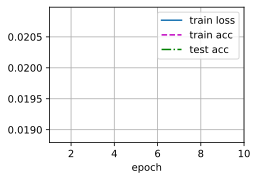

In [68]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_loader, num_epochs, lr, d2l.try_gpu(),trans)

In [ ]:
t = torch.Tensor(3,4)
t.cuda(0)